<h1 style="text-align: center;">Internapalooza 2016 Registration Data Analysis</h1>
<hr/>
## Background

In the summer of 2016, [Internapalooza](http://www.internapalooza.com/) hosted an enormous event where thousands of interns from across the world gathered in the San Francisco Bay Area to interact with each other, learn about some of the latest technolgies and ideas in the tech industry, and meet amazing companies. The data I'm analysing in this notebook is the data Internaplooza collected from the event registration form on their website.

I received an email from one of the Internapalooza organizers about a month ago that included a link to the data set I'm analysing here. The email also included a request to speak over the phone about having the company I'm currently working at be a participant in the event. I decided to pitched the idea of having our company participate at Internapalooza to my superiors, but not before analysing the data that had been given to me. The complete data set can be found [here](https://airtable.com/shrq8PvXTZuoMofJ0).

In [930]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

# Load internapalooza 2016 resume book data from csv file
df = pd.read_csv('internapalooza-2016-resume-book.csv')

## Data Description

All the data in data set pertains to the interns who registered for the Internapalooza event in the Summer of 2016. Most of the fields in the data set are self-explanatory and a description is provided below for fields with meanings that might need clarification.

| Field  | Data Type | Description  |
| ------ | --------- | ------------ | 
| First Name | text | | 
| Last Name | text | |
| Email | text | |
| Resume | text | |
| Major | text | |
| Company | text | |
| University | text | |
| Job Title | text | |
| Graduation Year | numeric | |
| Gender | text | |
| Ethnicity origin (or Race) | text | |
| GPA | numeric | The intern's grade point average (GPA), assumed to be on the 4.0 scale |
| Are you working on any side projects, companies, or dreams? Please share if so! | text | |
| Created | date | The date on which the intern submitted their information throught Internapalooza's online registration form.

Internapalooza made an attempt at anonymising the data, which means that records for the `First Name`, `Last Name`, `Email`, and `Resume` fields were emptied or made irrelevant by filling them with garbage data (as is the case for the `Resume` field).

In [931]:
# Show the first three records of the data set
df.head(3)

,﻿First Name,Last Name,Email,Resume,Major,Company,University,Job Title,Graduation Year,Gender,Ethnicity origin (or Race),GPA,"Are you working on any side projects, companies, or dreams? Please share if so!",Created
0,NaN,NaN,NaN,rsvp.a7d.AngieYueShen_Resume_20160710.pdf (htt...,Software Engineering,Juniper Networks,San Jose State University,Cloud Infrastructure Engineer Intern,2016.0,Female,Asian / Pacific Islander,4.0,NaN,7/12/2016
1,NaN,NaN,NaN,rsvp.a7d.AngieYueShen_Resume_20160710.pdf (htt...,Computer Science,Riverbed Technology,Stony Brook University,Software Engineer,2016.0,Female,Asian / Pacific Islander,4.0,NaN,7/12/2016
2,NaN,NaN,NaN,rsvp.a7d.AngieYueShen_Resume_20160710.pdf (htt...,Computer Sciences,Stanford University,Stanford University,Graduate Student,2016.0,Male,Asian / Pacific Islander,4.0,A project to help improve the on-boarding of s...,7/12/2016


In [932]:
# Show the last 3 records of the data set
df.tail(3)

,﻿First Name,Last Name,Email,Resume,Major,Company,University,Job Title,Graduation Year,Gender,Ethnicity origin (or Race),GPA,"Are you working on any side projects, companies, or dreams? Please share if so!",Created
4959,NaN,NaN,NaN,rsvp.a7d.AngieYueShen_Resume_20160710.pdf (htt...,Computer Science,Apple,"University Of California, Davis",Software Engineering Intern,2016.0,Male,White,3.0,NaN,4/18/2016
4960,NaN,NaN,NaN,rsvp.a7d.AngieYueShen_Resume_20160710.pdf (htt...,Computer Engineering and Computer Science,Slack,University of Michigan,Frontend Engineering intern,2017.0,Male,Black or African American,3.0,Yes,4/18/2016
4961,NaN,NaN,NaN,rsvp.a7d.AngieYueShen_Resume_20160710.pdf (htt...,Electrical and Computer Engineering & Human Co...,Fitbit,Carnegie Mellon University,Software Engineering Intern,2017.0,Male,White,3.0,NaN,4/18/2016


In [933]:
# Show the number of records in the data set
records_count = df.shape[0]
print('Number of records: ', records_count)

Number of records:  4962


## Cleaning the Data
---

In [934]:
# Remove 'First Name', 'Last Name', 'Email', and 'Resume' fields
df2 = df.copy()[df.columns.values[4:]]
df2.head(3)

,Major,Company,University,Job Title,Graduation Year,Gender,Ethnicity origin (or Race),GPA,"Are you working on any side projects, companies, or dreams? Please share if so!",Created
0,Software Engineering,Juniper Networks,San Jose State University,Cloud Infrastructure Engineer Intern,2016.0,Female,Asian / Pacific Islander,4.0,NaN,7/12/2016
1,Computer Science,Riverbed Technology,Stony Brook University,Software Engineer,2016.0,Female,Asian / Pacific Islander,4.0,NaN,7/12/2016
2,Computer Sciences,Stanford University,Stanford University,Graduate Student,2016.0,Male,Asian / Pacific Islander,4.0,A project to help improve the on-boarding of s...,7/12/2016


In [935]:
def print_unique(df, field_name):
    print("Unique '%s' values:" % (field_name))
    unique_values = df[field_name].unique()
    for value in unique_values:
        print('*', value)
    print()

# What are all the unique values of the 'Major' field?
# major_values = list(data['Major'].unique())
# print_unique(df2, major_values)

# What are all the unique values of the 'Company' field?
# company_values = list(data['Company'].unique())
# print_unique(df2, company_values)

# What are all the unique values of the 'University' field?
# university_values = list(data['University'].unique())
# print_unique(df2, university_values)

# What are all the unique values of the 'Job Title' field?
# job_title_values = list(data['Job Title'].unique())
# print_unique(df2, job_title_values)

# What are all the unique values of the 'Graduation Year' field?
# print_unique(df2, 'Graduation Year')

# What are all the unique values of the 'Gender' field?
# print_unique(df2, 'Gender')

# What are all the unique values of the 'Ethnicity origin (or Race)' field?
# print_unique(df2, 'Ethnicity origin (or Race)')

# What are all the unique values of the 'GPA' field?
# print_unique(df2, 'GPA')

The above print outs of unique values for most of the fields in the data set shows that the data is imperfect and requires cleaning. The data set contains missing values (NaN) and out-of-bounds or unreasonable data in the case of the `GPA` field.

In [936]:
# Fill out-of-bounds and unreasonable GPA values with NaN
for index in range(records_count):
    gpa_val = df2.loc[index, 'GPA']
    if gpa_val > 4 or gpa_val < 2:
        df2.loc[index,'GPA'] = np.nan
        
# Rough cleaning of the 'University' field until I learn a better way
for index in range(records_count):
    university_val = df2.loc[index, 'University']
    if university_val in ['UC Berkeley', 'University of California - Berkeley', 'uc berekeley']:
        df2.loc[index, 'University'] = 'University of California, Berkeley'
    elif university_val in ['UCSD', 'UC San Diego']:
        df2.loc[index, 'University'] = 'University of California, San Diego'
    elif university_val in ['UCLA']:
        df2.loc[index, 'University'] = 'University of California, Los Angeles'
    elif university_val in ['Caltech', 'caltech']:
        df2.loc[index, 'University'] = 'California Institute of Technology'
    elif university_val in ['Carnegie Mellon', 'CMU', 'carnegie mellon']:
        df2.loc[index, 'University'] = 'Carnegie Mellon University'
    elif university_val in ['Cornell', 'cornell']:
        df2.loc[index, 'University'] = 'Cornell University'
    elif university_val in ['Stanford', 'stanford']:
        df2.loc[index, 'University'] = 'Stanford University'
    elif university_val in ['ASU', 'Arizona State', 'Arizona State university', 'Arizona State Univeristy']:
        df2.loc[index, 'University'] = 'Arizona State University'
    elif university_val in ['Duke', 'duke']:
        df2.loc[index, 'University'] = 'Duke University'
    elif university_val in ['Purdue']:
        df2.loc[index, 'University'] = 'Purdue University'
    elif university_val in ['San Jose State']:
        df2.loc[index, 'University'] = 'San Jose State University'
    elif university_val in ['Brown']:
        df2.loc[index, 'University'] = 'Brown University'
    elif university_val in ['UPenn']:
        df2.loc[index, 'University'] = 'University of Pennsylvania'
    elif university_val in ['MIT']:
        df2.loc[index, 'University'] = 'Massachusetts Institute of Technology'
    elif university_val in ['Harvard']:
        df2.loc[index, 'University'] = 'Harvard University'
    elif university_val in ['NYU']:
        df2.loc[index, 'University'] = 'New York University'

In [937]:
intern_gpas = df2['GPA']
print('The mean GPA among interns is: %.2f' % (intern_gpas.mean()))
print('The median GPA among interns is: %.2f' % (intern_gpas.median()))
print('The mode GPA among interns is: %.2f' % (intern_gpas.mode()))

The mean GPA among interns is: 3.67
The median GPA among interns is: 4.00
The mode GPA among interns is: 4.00


### Probabilities for Intern GPAs

Note: 4580/4962 GPA values are valid. That is, 92.30% of GPA values are used in calculations.


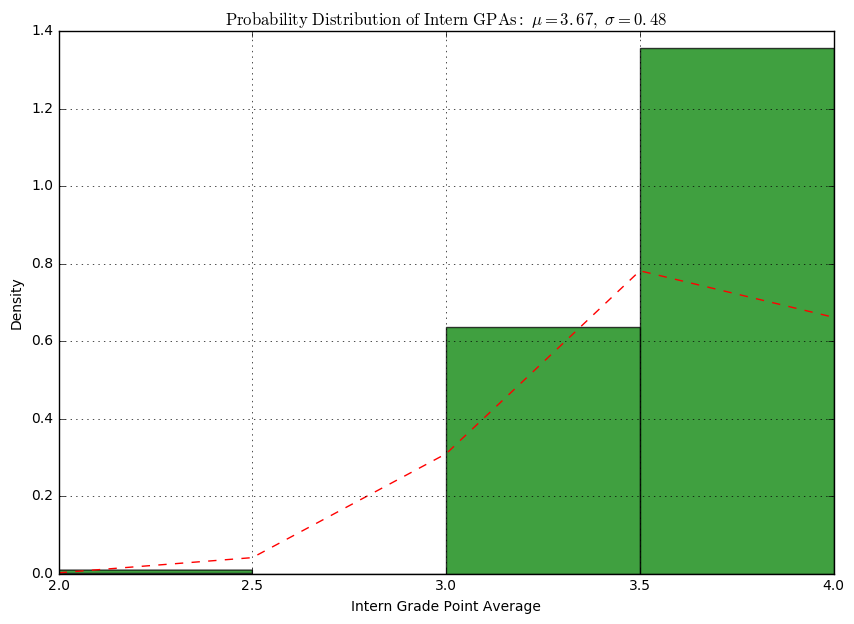

In [938]:
valid_gpas = df2[ intern_gpas.notnull() ]['GPA']
valid_gpa_count = valid_gpas.shape[0]
valid_gpa_percentage = valid_gpa_count / records_count * 100
valid_gpa_vals = valid_gpas.values

print('Note: %d/%d GPA values are valid. That is, %.2f%% of GPA values are used in calculations.' %
      (valid_gpa_count, records_count, valid_gpa_percentage))

mu, sigma = valid_gpa_vals.mean(), np.std(valid_gpa_vals)

# the histogram of the data
plt.figure(figsize=(10, 7), dpi=100)
n, bins, patches = plt.hist(valid_gpa_vals, bins=4, normed=True, facecolor='green', alpha=0.75)

# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('Intern Grade Point Average')
plt.ylabel('Density')
plt.title(r'$\mathrm{Probability\ Distribution\ of\ Intern\ GPAs:}\ \mu=%.2f,\ \sigma=%.2f$' % (mu, sigma))
plt.grid(True)
plt.show()

### Top 25 Universities
- What are the 25 Universies with the most interns registered for Internapalooza?

In [939]:
# Top 10 Universities
# This is a rough estimate of the top 25 universities represented among registered interns
# Better cleaning procedures on the 'University' field will yield a more accurate listing.
# But, I predict the rankings will not be drastically different
df2.groupby(['University']).size().sort_values(ascending=False)[:25]

University
University of California, Berkeley            291
Carnegie Mellon University                    183
San Jose State University                     164
University of California, San Diego           156
University of Southern California             130
Stanford University                           121
Georgia Institute of Technology               106
University of Waterloo                        101
University of California, Los Angeles          83
Massachusetts Institute of Technology          81
Cornell University                             72
Duke University                                63
University of Pennsylvania                     60
Brown University                               54
University of Michigan                         52
University of Texas at Austin                  50
Purdue University                              49
Columbia University                            49
University of Washington                       47
University of Illinois at Urbana-Champa

### Intern Gender Proportions
- What proportion of interns idenfied as Male, Female, or Other?

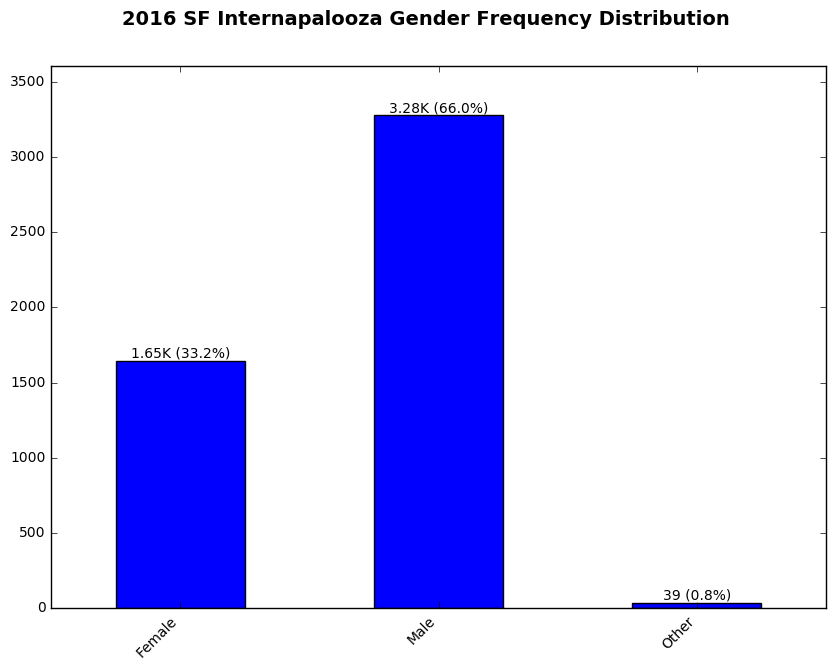

In [940]:
def bar(df, plt, field_names, title='', gw=10, bw=0.5):
    plt.figure(figsize=(gw, 7), dpi=100)
    breakdown = df.groupby(field_names).size()
    y_values = breakdown.values
    x_values = range(len(y_values))
    x_ticks = breakdown.index
    y_max = max(y_values)
    y_upper_lim = y_max + 0.10 * y_max
    
    plt.suptitle(title, fontsize=14, fontweight='bold')
    plt.bar(x_values, y_values, align='center', width=bw)
    plt.xticks(x_values, x_ticks, rotation=45, ha='right')
    plt.ylim([0, y_upper_lim])
    
    plt = label_bar(plt, x_values, y_values)
    plt.show()

def label_bar(plt, x_values, y_values, decimals = 2, units = 1000, suffix = 'K'):
    total_records = sum(y_values)
    for x, y in zip(x_values, y_values):
        percentage = y / float(total_records) * 100
        if y >= units:
            label = str(round(y / float(units), decimals)) + suffix
        else:
            label = str(y)
        plt.text(x, y, "%s (%.1f%%)" % (label, percentage), ha='center', va='bottom')
    return plt

gender_bar_title = '2016 SF Internapalooza Gender Frequency Distribution'
bar(df2, plt, field_names=['Gender'], title=gender_bar_title)

### Intern Ethicity/Race Proportions

What proportion of interns idenfied among the following ethnicities or races?
* Asian / Pacific Islander
* Black or African American
* Hispanic or Latino
* Native American or American Indian
* White
* Other

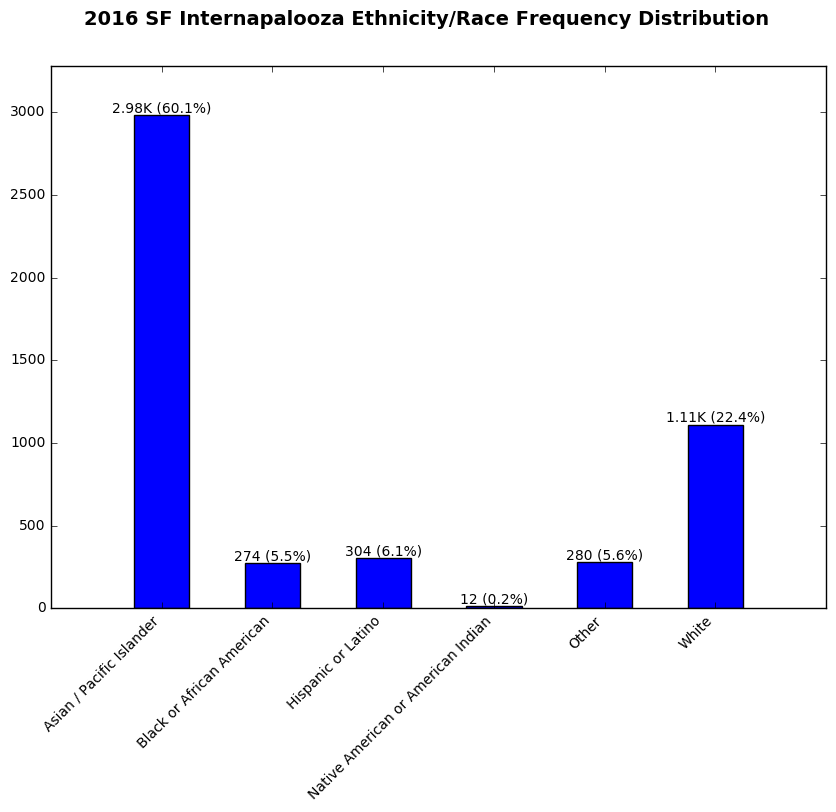

In [941]:
eor_bar_title = '2016 SF Internapalooza Ethnicity/Race Frequency Distribution'
eor_bar_field_names = ['Ethnicity origin (or Race)']
bar(df2, plt, field_names=eor_bar_field_names, title=eor_bar_title)

## Assumptions
---
I assumed that the reported `GPA` values were on the 4.0 scale. This assumption underlies my decision to only analyse `GPA` values that are non-negative, non-zero, and less than 4. I also assumed that it's unlikely that a university would have a student enrolled with a `GPA` less than 2. This led me to discard values between 0 (inclusive) and 2 (exclusive) from the pool of valid `GPA`s.


## Conclusion and Recommendations
---

Nearly 5000 interns registered for the Internapalooza event in Summer 2016. The gross majority of registered interns were White or Asian males, coming from a predictable list of universities often associated with top performing tech talent. However, I remain skeptical of the data provided in the `GPA` field. I was surprised at the lack of variation in `GPA` values. Valid `GPA` values were either 2, 3, or 4, with the majority (67.8%) being 4s. That said, the data indicated that the probability of a registered intern having a `GPA` between 3.0 and 4.0 is roughly 1.

Internapalooza could use the following recommendations to improve the quality of the data they collect. 
* Enforce a range limit on fields such as the `GPA` field to ensure the values are normative.
* Allow registrants to choose from/add to a searchable list of job titles, schools, and companies so that the collected data will be more standardised. This would also minimize the input of different values that mean the same thing, eg. Twitter, Inc and Twitter for the `Company` field, or UCLA and University of California, Los Angeles for the `University` field.

This analysis can be further improved by implementing better means of cleaning the `University` or `Company` fields. Additionally, I could have extracted more information from these two fields, including the ratio of Science, Technology, Engineering, and Mathematics (STEM) interns to non-STEM interns. I could have also investigated the peak registration time for interns using the `Created` field. But, with time as a major constraint, these improvents were left undone.

## Have a Laugh
---

In [942]:
dfx = df.copy()
dfx = dfx[dfx.columns.values[4:-1]]

In [943]:
# To the Astronomy Inspector who admires MLK and inspects Higgs-Bosons at Ur M. Om
dfx.iloc[1039]

Major                                                                              Inspecting Higgs-Bosons
Company                                                                                           Ur M. Om
University                                                                                     Higgs-Boson
Job Title                                                                              Astronomy Inspector
Graduation Year                                                                                       2021
Gender                                                                                               Other
Ethnicity origin (or Race)                                                                           White
GPA                                                                                                      1
Are you working on any side projects, companies, or dreams? Please share if so!          I have a dream...
Name: 1039, dtype: object

In [944]:
# To the person majoring in 'Tropicana is 100% orange juice' with a GPA over 9000!
# Thank you for your hard work.
dfx.iloc[181]

Major                                                                              Tropicana is 100% orange juice
Company                                                                                                    Toptal
University                                                                                             Utah State
Job Title                                                                                                  Intern
Graduation Year                                                                                              2018
Gender                                                                                                      Other
Ethnicity origin (or Race)                                                                                  Other
GPA                                                                                                          9001
Are you working on any side projects, companies, or dreams? Please share if so!         

In [945]:
# Be very afraid! This nerd has his heart set on world domination, but he needs to work on his GPA first!
dfx.iloc[197]

Major                                                                                             CS
Company                                                                                         Yelp
University                                                                                 Cambridge
Job Title                                                                          Software Engineer
Graduation Year                                                                                 2017
Gender                                                                                          Male
Ethnicity origin (or Race)                                                                     White
GPA                                                                                              NaN
Are you working on any side projects, companies, or dreams? Please share if so!     World domination
Name: 197, dtype: object

In [946]:
# Our kids are trying to tell us something. This one is probably stressed out. He's doing 'too much'.
dfx.iloc[4610]

Major                                                                                                       CS
Company                                                                                                 Twilio
University                                                                                                 CMU
Job Title                                                                          Software Engineering Intern
Graduation Year                                                                                           2017
Gender                                                                                                    Male
Ethnicity origin (or Race)                                                                               White
GPA                                                                                                          3
Are you working on any side projects, companies, or dreams? Please share if so!                       too much
N

In [947]:
# I'm interested in this guy's project. If you're reading this, let's talk!
dfx.iloc[4501]

Major                                                                                                       CS
Company                                                                                                  Lumia
University                                                                                             Caltech
Job Title                                                                                           VC Analyst
Graduation Year                                                                                           2018
Gender                                                                                                    Male
Ethnicity origin (or Race)                                                            Asian / Pacific Islander
GPA                                                                                                          4
Are you working on any side projects, companies, or dreams? Please share if so!    Working on a human exosuit!
N